<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importing-packages" data-toc-modified-id="Importing-packages-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importing packages</a></span></li><li><span><a href="#Setting-path-to-code-files" data-toc-modified-id="Setting-path-to-code-files-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Setting path to code files</a></span></li><li><span><a href="#Reading-literature-text" data-toc-modified-id="Reading-literature-text-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Reading literature text</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Hardcoding-data-for-demo-(Actual-data-from-provided-dataset)" data-toc-modified-id="Hardcoding-data-for-demo-(Actual-data-from-provided-dataset)-3.0.1"><span class="toc-item-num">3.0.1&nbsp;&nbsp;</span>Hardcoding data for demo (Actual data from provided dataset)</a></span></li></ul></li></ul></li><li><span><a href="#Exploring-the-data" data-toc-modified-id="Exploring-the-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exploring the data</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Create-a-subsetted-text-field-for-easier-printing" data-toc-modified-id="Create-a-subsetted-text-field-for-easier-printing-4.0.1"><span class="toc-item-num">4.0.1&nbsp;&nbsp;</span>Create a subsetted text field for easier printing</a></span></li></ul></li><li><span><a href="#Missing-values-in-dataset" data-toc-modified-id="Missing-values-in-dataset-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Missing values in dataset</a></span><ul class="toc-item"><li><span><a href="#Check-data-where-text-is-missing" data-toc-modified-id="Check-data-where-text-is-missing-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Check data where text is missing</a></span></li></ul></li><li><span><a href="#Length-of-text-fields" data-toc-modified-id="Length-of-text-fields-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Length of text fields</a></span></li><li><span><a href="#Converting-dataset-structure-for-training-BioBERT-model" data-toc-modified-id="Converting-dataset-structure-for-training-BioBERT-model-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Converting dataset structure for training BioBERT model</a></span></li><li><span><a href="#Inference-dataset-class-used-for-BioBERT-predictions" data-toc-modified-id="Inference-dataset-class-used-for-BioBERT-predictions-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Inference dataset class used for BioBERT predictions</a></span></li><li><span><a href="#Batch-prediction-class-for-BioBERT-inference" data-toc-modified-id="Batch-prediction-class-for-BioBERT-inference-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Batch prediction class for BioBERT inference</a></span></li><li><span><a href="#Define-BioBERT-class-for-multi-label-classification" data-toc-modified-id="Define-BioBERT-class-for-multi-label-classification-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Define BioBERT class for multi-label classification</a></span></li><li><span><a href="#Load-best-performing-mutation-effect-detection-model" data-toc-modified-id="Load-best-performing-mutation-effect-detection-model-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Load best performing mutation effect detection model</a></span></li><li><span><a href="#Predict-on-input-literature" data-toc-modified-id="Predict-on-input-literature-4.8"><span class="toc-item-num">4.8&nbsp;&nbsp;</span>Predict on input literature</a></span></li><li><span><a href="#Extract-and-format-predictions" data-toc-modified-id="Extract-and-format-predictions-4.9"><span class="toc-item-num">4.9&nbsp;&nbsp;</span>Extract and format predictions</a></span></li><li><span><a href="#Explain-predictions-using-model-explainability-package-LIME" data-toc-modified-id="Explain-predictions-using-model-explainability-package-LIME-4.10"><span class="toc-item-num">4.10&nbsp;&nbsp;</span>Explain predictions using model explainability package LIME</a></span><ul class="toc-item"><li><span><a href="#Define-Lime-Text-Explainer" data-toc-modified-id="Define-Lime-Text-Explainer-4.10.1"><span class="toc-item-num">4.10.1&nbsp;&nbsp;</span>Define Lime Text Explainer</a></span></li></ul></li><li><span><a href="#Loop-through-literature-to-explain-model-predictions" data-toc-modified-id="Loop-through-literature-to-explain-model-predictions-4.11"><span class="toc-item-num">4.11&nbsp;&nbsp;</span>Loop through literature to explain model predictions</a></span></li></ul></li></ul></div>

# NLP Pipeline for extracting Disease Characteristics from literature
Contains following modules:
- BioBERT based genetic mutation effect classification using deep learning
- LIME Explanation for BioBERT predictions for model explainability


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing packages

In [ ]:
! pip install transformers==3.0.2

In [ ]:
# Importing stock ml libraries


import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
import os 
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
nltk.download('stopwords')


stop_words = set(stopwords.words('english'))

import spacy

# Show full text in pandas dataframe
pd.set_option('display.max_colwidth', -1)

# Colormap
cm = sns.light_palette("green", as_cmap=True)

import warnings
warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn import metrics
import transformers
import torch
from torch.utils.data import Dataset, DataLoader, RandomSampler, SequentialSampler
from transformers import DistilBertTokenizer, DistilBertModel, BertTokenizer, BertModel
import logging
logging.basicConfig(level=logging.ERROR)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.


In [ ]:
from torch import cuda
device = 'cuda' if cuda.is_available() else 'cpu'

In [ ]:
device

'cuda'

## Setting path to code files

Change current working directory to this notebook's location

In [ ]:
os.getcwd()

'/content'

In [ ]:
code_path = '/content/drive/MyDrive/GitHub IU/nlp_mutation_effect_pred/final_project_files/code/'

In [ ]:
os.chdir(code_path)
os.getcwd()

'/content/drive/MyDrive/GitHub IU/nlp_mutation_effect_pred/final_project_files/code'

In [ ]:
!pip install contractions

In [ ]:
import helper_functions_nlp as hf

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Reading literature text
- This can be read from a CSV or URL
- Final structure should be a dataframe with a "text" column containing the literature text

In [ ]:
data_path = '../data/'
os.listdir(data_path)

[]

In [ ]:
# data = pd.read_excel(data_path + 'Functional_Consequences_v1.xlsx', sheet_name='data-1611195358207')


In [ ]:
#data = pd.read_excel(data_path + 'Data_v3.xlsx', sheet_name='Sheet1', index_col=0)


#### Hardcoding data for demo (Actual data from provided dataset)

In [ ]:
lit_texts = ['the mutation was not found in the gnomad database, but the heterozygous variant was found in 2 of about 3,500 individuals in an in-house database of mainly arab muslim individuals. functional studies of the variant and studies of patient cells were not performed, but the variant was predicted to result in a loss of function. {5:heimer et (2019)} identified homozygosity for the c.376dupt mutation in exon 3 of the ntng2 gene in 3 patients from 2 consanguineous arab muslim families with nedbash. the mutation, which was found by whole-exome sequencing and confirmed by sanger sequencing, segregated with the disorder in both families. functional studies of the variant and studies of patient cells were not performed, but the mutation was predicted to result in nonsense-mediated mrna decay and a loss of function.\nin 2 sibs, born of consanguineous iranian parents (family 1) with neurodevelopmental disorder with behavioral abnormalities, absent speech, and hypotonia (nedbash; {618718}), {3:dias et (2019)} identified a homozygous c.1367g-a transition ({var c.1367g-a, nm_032536.3}) in exon 7 of the ntng2 gene, resulting in a cys456-to-tyr (c456y) substitution at a conserved residue in the egf4 domain. the mutation, which was found by exome sequencing, segregated with the disorder in the family.', 
             "the l24p mutant protein was insoluble in solution, was likely misfolded, and formed multiple abnormal aggregates, whereas wildtype bach2 was soluble in solution and formed proper dimers. the findings suggested that the mutant protein was unable to dimerize and was unstable; further coexpression studies were consistent with haploinsufficiency rather than a dominant-negative effect.\nin a father and daughter (family b) with immunodeficiency-60 (imd60; {618394}), {1:afzali et (2017)} identified a heterozygous c.2362g-a transition in the bach2 gene, resulting in a glu788-to-lys (e788k) substitution at a highly conserved residue in the c terminus. the mutant e788k protein aggregated primarily in the cytoplasm with little nuclear localization, whereas the wildtype protein was evenly distributed in both the cytoplasm and nucleus. the findings suggested that the mutant protein had decreased stability compared to wildtype; further coexpression studies were consistent with haploinsufficiency rather than a dominant-negative effect.",
             "the mutation was predicted to disrupt the region surrounding the ribose-5-phosphate binding site and thus affect the catalytic site. the mother of these sibs, who had no hearing deficit or neurologic dysfunction at age 66, also carried the mutation; the mutation was heterozygous in the females and hemizygous in the male proband. erythrocyte prps1 activity was not detectable in the proband, was decreased in the sister, and was normal in the mother. the findings illustrated that prps1 deficiency can present as a continuous spectrum of clinical features, even within the same family.\nin a dutch family with arts syndrome (arts; {301835}) originally reported by {2:arts et (1993)}, {12:de brouwer et (2007)} found that the disorder was associated with a 455t-c transition in exon 4 of the prps1 gene that resulted in a leu152-to-pro (l152p) substitution.\nin an australian family with arts syndrome (arts; {301835}), {12:de brouwer et (2007)} found that the disorder was caused by a 398a-c transversion in exon 3 of the prps1 gene that resulted in a gln133-to-pro (q133p) substitution. enzyme assays and molecular modeling demonstrated loss of function of the mutant protein. patient fibroblasts showed normal prpp synthetase activity, whereas erythrocytes showed a loss of enzyme activity, suggesting that the effect of the v142l mutation on protein activity depends on cell type. {19:moran et (2012)} postulated a gain-of-function effect in proliferating cells and a loss-of-function effect in postmitotic cells. the report indicated that prps1 missense mutations can cause a continuous spectrum of features ranging from progressive nonsyndromic postlingual hearing impairment to uric acid overproduction, neuropathy, and recurrent infections depending on the functional sites affected.\nin a german family with variable manifestations of prps1 deficiency, including a man with a protracted form of arts syndrome (arts; {301835}) and his sister with x-linked deafness-1 (dfnx1; {304500}), {25:synofzik et (2014)} identified a c.830a-c transversion in the prps1 gene, resulting in a gln277-to-pro (q277p) substitution at a highly conserved residue in the c-terminal domain close to the catalytic site.	"]

In [ ]:
data = pd.DataFrame({'text':lit_texts, 'label':['LOF' ,'DN', 'GOF']})

In [ ]:
data.head()

,text,label
0,"the mutation was not found in the gnomad database, but the heterozygous variant was found in 2 of about 3,500 individuals in an in-house database of mainly arab muslim individuals. functional studies of the variant and studies of patient cells were not performed, but the variant was predicted to result in a loss of function. {5:heimer et (2019)} identified homozygosity for the c.376dupt mutation in exon 3 of the ntng2 gene in 3 patients from 2 consanguineous arab muslim families with nedbash. the mutation, which was found by whole-exome sequencing and confirmed by sanger sequencing, segregated with the disorder in both families. functional studies of the variant and studies of patient cells were not performed, but the mutation was predicted to result in nonsense-mediated mrna decay and a loss of function.\nin 2 sibs, born of consanguineous iranian parents (family 1) with neurodevelopmental disorder with behavioral abnormalities, absent speech, and hypotonia (nedbash; {618718}), {3:dias et (2019)} identified a homozygous c.1367g-a transition ({var c.1367g-a, nm_032536.3}) in exon 7 of the ntng2 gene, resulting in a cys456-to-tyr (c456y) substitution at a conserved residue in the egf4 domain. the mutation, which was found by exome sequencing, segregated with the disorder in the family.",LOF
1,"the l24p mutant protein was insoluble in solution, was likely misfolded, and formed multiple abnormal aggregates, whereas wildtype bach2 was soluble in solution and formed proper dimers. the findings suggested that the mutant protein was unable to dimerize and was unstable; further coexpression studies were consistent with haploinsufficiency rather than a dominant-negative effect.\nin a father and daughter (family b) with immunodeficiency-60 (imd60; {618394}), {1:afzali et (2017)} identified a heterozygous c.2362g-a transition in the bach2 gene, resulting in a glu788-to-lys (e788k) substitution at a highly conserved residue in the c terminus. the mutant e788k protein aggregated primarily in the cytoplasm with little nuclear localization, whereas the wildtype protein was evenly distributed in both the cytoplasm and nucleus. the findings suggested that the mutant protein had decreased stability compared to wildtype; further coexpression studies were consistent with haploinsufficiency rather than a dominant-negative effect.",DN
2,"the mutation was predicted to disrupt the region surrounding the ribose-5-phosphate binding site and thus affect the catalytic site. the mother of these sibs, who had no hearing deficit or neurologic dysfunction at age 66, also carried the mutation; the mutation was heterozygous in the females and hemizygous in the male proband. erythrocyte prps1 activity was not detectable in the proband, was decreased in the sister, and was normal in the mother. the findings illustrated that prps1 deficiency can present as a continuous spectrum of clinical features, even within the same family.\nin a dutch family with arts syndrome (arts; {301835}) originally reported by {2:arts et (1993)}, {12:de brouwer et (2007)} found that the disorder was associated with a 455t-c transition in exon 4 of the prps1 gene that resulted in a leu152-to-pro (l152p) substitution.\nin an australian family with arts syndrome (arts; {301835}), {12:de brouwer et (2007)} found that the disorder was caused by a 398a-c transversion in exon 3 of the prps1 gene that resulted in a gln133-to-pro (q133p) substitution. enzyme assays and molecular modeling demonstrated loss of function of the mutant protein. patient fibroblasts showed normal prpp synthetase activity, whereas erythrocytes showed a loss of enzyme activity, suggesting that the effect of the v142l mutation on protein activity depends on cell type. {19:moran et (2012)} postulated a gain-of-function effect in proliferating cells and a loss-of-function effect in postmitotic cells. the report indicated that prps1 missense mutations can cause a continuous spectrum of features ranging from pr

## Exploring the data

#### Create a subsetted text field for easier printing

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    3 non-null      object
 1   label   3 non-null      object
dtypes: object(2)
memory usage: 176.0+ bytes


In [ ]:
data.describe(include='O')

,text,label
count,3,3
unique,3,3
top,"the mutation was not found in the gnomad database, but the heterozygous variant was found in 2 of about 3,500 individuals in an in-house database of mainly arab muslim individuals. functional studies of the variant and studies of patient cells were not performed, but the variant was predicted to result in a loss of function. {5:heimer et (2019)} identified homozygosity for the c.376dupt mutation in exon 3 of the ntng2 gene in 3 patients from 2 consanguineous arab muslim families with nedbash. the mutation, which was found by whole-exome sequencing and confirmed by sanger sequencing, segregated with the disorder in both families. functional studies of the variant and studies of patient cells were not performed, but the mutation was predicted to result in nonsense-mediated mrna decay and a loss of function.\nin 2 sibs, born of consanguineous iranian parents (family 1) with neurodevelopmental disorder with behavioral abnormalities, absent speech, and hypotonia (nedbash; {618718}), {3:dias et (2019)} identified a homozygous c.1367g-a transition ({var c.1367g-a, nm_032536.3}) in exon 7 of the ntng2 gene, resulting in a cys456-to-tyr (c456y) substitution at a conserved residue in the egf4 domain. the mutation, which was found by exome sequencing, segregated with the disorder in the family.",DN
freq,1,1


### Missing values in dataset

In [ ]:
pd.concat([data.isnull().sum().sort_values(ascending=False), data.isnull().sum().sort_values(ascending=False)*100/len(data)], axis=1).rename(columns={0:'missing_count', 1:'missing_pct'})

,missing_count,missing_pct
label,0,0.0
text,0,0.0


#### Check data where text is missing

In [ ]:
data[data.text.isnull()]

,text,label


In [ ]:
data = data[~data.text.isnull()]

### Length of text fields
- Long literature texts contain noise, ideally provide shorter texts (8-10 sentences) for best model performance 

In [ ]:
data, cols = hf.linguistic_feature_gen(data, col = "text")

Started linguistic feature generation on column: text
Finished linguistic feature generation, created following new columns:  ['num_words', 'num_unique_words', 'words_vs_unique', 'num_symbols', 'caps_vs_length', 'num_exclamation_marks', 'num_question_marks', 'avg_word_length', 'capitals', 'upper_case_word_count', 'char_count', 'num_punctuation', 'total_length']


In [ ]:
data.columns

Index(['text', 'label', 'total_length', 'capitals', 'caps_vs_length',
       'num_exclamation_marks', 'num_question_marks', 'num_punctuation',
       'num_symbols', 'num_words', 'num_unique_words', 'words_vs_unique',
       'char_count', 'avg_word_length', 'upper_case_word_count'],
      dtype='object')

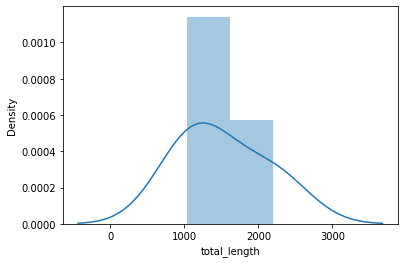

In [ ]:
sns.distplot(data.total_length)

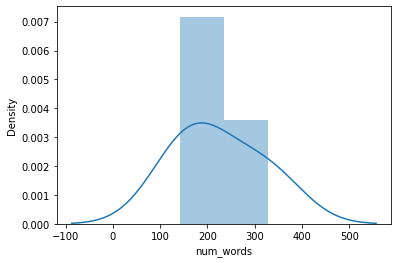

In [ ]:
sns.distplot(data.num_words)

### Converting dataset structure for training BioBERT model

In [ ]:
categories = ['HI', 'DN', 'none', 'GOF', 'LOF']

### Inference dataset class used for BioBERT predictions

In [ ]:
MAX_LEN = 512
TRAIN_BATCH_SIZE = 6
VALID_BATCH_SIZE = 4
LEARNING_RATE = 3e-05
tokenizer = BertTokenizer.from_pretrained('dmis-lab/biobert-v1.1', do_lower_case=True)

In [ ]:
class InferenceDataset(Dataset):
    def __init__(self, texts, tokenizer, max_len, padding=True):
        self.tokenizer = tokenizer
        self.text = texts
        self.max_len = max_len
        self.padding = padding

    def __len__(self):
        return len(self.text)

    def __getitem__(self, index):
        text = self.text[index]

        inputs = self.tokenizer.encode_plus(
            text,
            None,
            add_special_tokens=True,
            max_length=self.max_len,
            pad_to_max_length=self.padding,
            return_token_type_ids=True
        )
        ids = inputs['input_ids']
        mask = inputs['attention_mask']
        token_type_ids = inputs["token_type_ids"]


        return {
            'ids': torch.tensor(ids, dtype=torch.long),
            'mask': torch.tensor(mask, dtype=torch.long),
            'token_type_ids': torch.tensor(token_type_ids, dtype=torch.long)
        }

### Batch prediction class for BioBERT inference

In [ ]:
def predict_batch_inference(predictor, input_text, tokenizer, MAX_LEN=512, batch_size=32, device='cpu', padding=False, quantize = False):
  """Function to run batch inference on input text"""

  if quantize:
        predictor = torch.quantization.quantize_dynamic(predictor, {torch.nn.Linear}, dtype=torch.qint8)

  data_set = InferenceDataset(input_text, tokenizer, MAX_LEN, padding)



  data_params = {'batch_size': batch_size,
                  'shuffle': False,
                  'num_workers': 0
                  }
  data_loader = DataLoader(data_set, **data_params)


  predictor.eval()
  pred_dataloader=[]

  with torch.no_grad():
      for _, data in enumerate(data_loader, 0):
          ids = data['ids'].to(device, dtype = torch.long)
          mask = data['mask'].to(device, dtype = torch.long)
          token_type_ids = data['token_type_ids'].to(device, dtype = torch.long)
          outputs = predictor(ids, mask, token_type_ids)
          pred_dataloader.extend(torch.sigmoid(outputs).cpu().detach().numpy().tolist())
  return pred_dataloader

### Define BioBERT class for multi-label classification

BioBERT: a pre-trained biomedical language representation model for biomedical text mining


![BioBERT](https://oup.silverchair-cdn.com/oup/backfile/Content_public/Journal/bioinformatics/36/4/10.1093_bioinformatics_btz682/1/btz682f1.png?Expires=1615567354&Signature=bf-GYOtQUZ08xTELvuYDQv~Dmh1PZFF8T5YFdydAHj87wFZc7mz~36ElUPzvUTEdZ6ufGs8opcY4h4hMdc8dW~EWWpTaJggwxTdOOJ89OYecNTmwSqMRNS71totCvhD2-sPSDaCfxl6mgKV67uJL~lvKkZQj03vR0AWwcxMTgFs~uMjt0WfB~FZLlArhLaJX9fWYTC8Z8~sGA4swg4lsLz1OoCjqAZN6gde2rqiqiVf6rOEtTp6bm8qySCAEVupA7zAMHZDysdQ53PYwcNmlsOhbL2iF2yZFRyHFoY5kj7TvIpax~JcTh9WL2evZWeFuD2sRMDZtWsZhUicz4yEf9Q__&Key-Pair-Id=APKAIE5G5CRDK6RD3PGA)
- Paper: https://academic.oup.com/bioinformatics/article/36/4/1234/5566506
- Code: https://github.com/dmis-lab/biobert

In [ ]:
class BioBERTClass(torch.nn.Module):
    def __init__(self):
        super(BioBERTClass, self).__init__()
        self.l1 = BertModel.from_pretrained("dmis-lab/biobert-v1.1")
        self.pre_classifier = torch.nn.Linear(768, 768)
        self.dropout = torch.nn.Dropout(0.2)
        self.classifier = torch.nn.Linear(768, 5)

    def forward(self, input_ids, attention_mask, token_type_ids):
        output_1 = self.l1(input_ids=input_ids, attention_mask=attention_mask)
        
        hidden_state = output_1[0]
        pooler = hidden_state[:, 0]
        pooler = self.pre_classifier(pooler)
        pooler = torch.nn.ReLU()(pooler)
        pooler = self.dropout(pooler)
        output = self.classifier(pooler)
        return output


### Load best performing mutation effect detection model
- Current best model is finetuned BioBERT model for 3 epochs

In [ ]:
predictor = torch.load('../models/biobert_v2_epoch3.bin', map_location=torch.device(device))



### Predict on input literature

In [ ]:
pred_y = predict_batch_inference(predictor, data.text,
                                              tokenizer, MAX_LEN=MAX_LEN, batch_size=128, 
                                              device=device, padding = True, quantize = False)


### Extract and format predictions

In [ ]:
data['predicted_probs'] = pred_y

In [ ]:
data = pd.concat([data, pd.DataFrame(data["predicted_probs"].to_list(), columns=categories)], axis = 1)

In [ ]:
data[['text', 'label'] + categories].head()

,text,label,HI,DN,none,GOF,LOF
0,"the mutation was not found in the gnomad database, but the heterozygous variant was found in 2 of about 3,500 individuals in an in-house database of mainly arab muslim individuals. functional studies of the variant and studies of patient cells were not performed, but the variant was predicted to result in a loss of function. {5:heimer et (2019)} identified homozygosity for the c.376dupt mutation in exon 3 of the ntng2 gene in 3 patients from 2 consanguineous arab muslim families with nedbash. the mutation, which was found by whole-exome sequencing and confirmed by sanger sequencing, segregated with the disorder in both families. functional studies of the variant and studies of patient cells were not performed, but the mutation was predicted to result in nonsense-mediated mrna decay and a loss of function.\nin 2 sibs, born of consanguineous iranian parents (family 1) with neurodevelopmental disorder with behavioral abnormalities, absent speech, and hypotonia (nedbash; {618718}), {3:dias et (2019)} identified a homozygous c.1367g-a transition ({var c.1367g-a, nm_032536.3}) in exon 7 of the ntng2 gene, resulting in a cys456-to-tyr (c456y) substitution at a conserved residue in the egf4 domain. the mutation, which was found by exome sequencing, segregated with the disorder in the family.",LOF,0.126200,0.015175,0.020833,0.026847,0.858519
1,"the l24p mutant protein was insoluble in solution, was likely misfolded, and formed multiple abnormal aggregates, whereas wildtype bach2 was soluble in solution and formed proper dimers. the findings suggested that the mutant protein was unable to dimerize and was unstable; further coexpression studies were consistent with haploinsufficiency rather than a dominant-negative effect.\nin a father and daughter (family b) with immunodeficiency-60 (imd60; {618394}), {1:afzali et (2017)} identified a heterozygous c.2362g-a transition in the bach2 gene, resulting in a glu788-to-lys (e788k) substitution at a highly conserved residue in the c terminus. the mutant e788k protein aggregated primarily in the cytoplasm with little nuclear localization, whereas the wildtype protein was evenly distributed in both the cytoplasm and nucleus. the findings suggested that the mutant protein had decreased stability compared to wildtype; further coexpression studies were consistent with haploinsufficiency rather than a dominant-negative effect.",DN,0.086087,0.863678,0.012123,0.093234,0.018694
2,"the mutation was predicted to disrupt the region surrounding the ribose-5-phosphate binding site and thus affect the catalytic site. the mother of these sibs, who had no hearing deficit or neurologic dysfunction at age 66, also carried the mutation; the mutation was heterozygous in the females and hemizygous in the male proband. erythrocyte prps1 activity was not detectable in the proband, was decreased in the sister, and was normal in the mother. the findings illustrated that prps1 deficiency can present as a continuous spectrum of clinical features, even within the same family.\nin a dutch family with arts syndrome (arts; {301835}) originally reported by {2:arts et (1993)}, {12:de brouwer et (2007)} found that the disorder was associated with a 455t-c transition in exon 4 of the prps1 gene that resulted in a leu152-to-pro (l152p) substitution.\nin an australian family with arts syndrome (arts; {301835}), {12:de brouwer et (2007)} found that the disorder was caused by a 398a-c transversion in exon 3 of the prps1 gene that resulted in a gln133-to-pro (q133p) substitution. enzyme assays and molecular modeling demonstrated loss of function of the mutant protein. patient fibroblasts showed normal prpp synthetase activity, whereas erythrocytes showed a loss of enzyme activity, suggesting that the effect of the v142l mutation on protein activity depends on cell type. {19:moran et (2012)} postulated a gain-of-function effect in proliferating cells and a loss-of-function effect in postmitotic cells. t

### Explain predictions using model explainability package LIME 
- LOCAL INTERPRETABLE MODEL-AGNOSTIC EXPLANATIONS
- Paper: https://arxiv.org/pdf/1602.04938.pdf
- Code: https://github.com/marcotcr/lime

In [ ]:
!pip install lime

In [ ]:
device

'cuda'

In [ ]:
categories

['HI', 'DN', 'none', 'GOF', 'LOF']

In [ ]:
class_names = ['HI', 'DN', 'none', 'GOF', 'LOF']


#### Define Lime Text Explainer

In [ ]:
import lime
from lime.lime_text import LimeTextExplainer



def predictor_func(texts):

  pred_y = predict_batch_inference(predictor, texts,
                                              tokenizer, MAX_LEN=MAX_LEN, batch_size=128, 
                                              device=device, padding = True, quantize = False)
  return np.array(pred_y)

explainer = LimeTextExplainer(class_names=class_names)


In [ ]:
os.getcwd()

'/content/drive/My Drive/GitHub IU/nlp_mutation_effect_pred/final_project_files/code'

In [ ]:
data.text

0    the mutation was not found in the gnomad database, but the heterozygous variant was found in 2 of about 3,500 individuals in an in-house database of mainly arab muslim individuals. functional studies of the variant and studies of patient cells were not performed, but the variant was predicted to result in a loss of function. {5:heimer et (2019)} identified homozygosity for the c.376dupt mutation in exon 3 of the ntng2 gene in 3 patients from 2 consanguineous arab muslim families with nedbash. the mutation, which was found by whole-exome sequencing and confirmed by sanger sequencing, segregated with the disorder in both families. functional studies of the variant and studies of patient cells were not performed, but the mutation was predicted to result in nonsense-mediated mrna decay and a loss of function.\nin 2 sibs, born of consanguineous iranian parents (family 1) with neurodevelopmental disorder with behavioral abnormalities, absent speech, and hypotonia (nedbash; {618718}), {3

### Loop through literature to explain model predictions

In [ ]:
for index, row in data.iterrows():

  # Render only for first 5 documents
  if index > 5:
    break

  print("\nExplaining Predictions in Input Literature:", index + 1)

  exp = explainer.explain_instance(row.text, predictor_func, num_features=20, num_samples=800, top_labels=2)
  exp.show_in_notebook(text=row.text)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
data[['text', 'label'] + categories].to_csv('BioBert_results.csv')